In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='Your Client Id ' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = 'Your Client Secret' # Client Secret; copy this from your app
username = 'User name' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://beta.developer.spotify.com/dashboard/applications/ef60e9f2d37b4913963c7e7e9c572c96'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [2]:
import pandas as pd

sourcePlaylistID = 'PlayListId'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

In [3]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Uptown Funk (feat. Bruno Mars),0.856,0.609,0,-7.223,1,0.0824,0.00801,0.000082,0.0344,0.928,114.988,audio_features,32OlwWuMpZ6b0aN2RZOeMS,spotify:track:32OlwWuMpZ6b0aN2RZOeMS,https://api.spotify.com/v1/tracks/32OlwWuMpZ6b...,https://api.spotify.com/v1/audio-analysis/32Ol...,269667,4
The Days - Henrik B Remix,0.584,0.824,9,-5.236,0,0.0446,0.01530,0.000007,0.0970,0.542,126.964,audio_features,4eteOEGYlGM33q76CKdPom,spotify:track:4eteOEGYlGM33q76CKdPom,https://api.spotify.com/v1/tracks/4eteOEGYlGM3...,https://api.spotify.com/v1/audio-analysis/4ete...,236946,4
Kaun Tujhe,0.531,0.431,2,-8.937,0,0.0370,0.86800,0.000025,0.1270,0.190,107.990,audio_features,5T2ZZiBMDGh3TZDUbxg4rV,spotify:track:5T2ZZiBMDGh3TZDUbxg4rV,https://api.spotify.com/v1/tracks/5T2ZZiBMDGh3...,https://api.spotify.com/v1/audio-analysis/5T2Z...,241449,4
Thunder,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,audio_features,1zB4vmk8tFRmM9UULNzbLB,spotify:track:1zB4vmk8tFRmM9UULNzbLB,https://api.spotify.com/v1/tracks/1zB4vmk8tFRm...,https://api.spotify.com/v1/audio-analysis/1zB4...,187147,4
Phir Se Ud Chala,0.647,0.656,11,-8.632,1,0.0354,0.65700,0.000163,0.3430,0.453,119.965,audio_features,1kcV2LJxt5v0s2cEGtEJ5i,spotify:track:1kcV2LJxt5v0s2cEGtEJ5i,https://api.spotify.com/v1/tracks/1kcV2LJxt5v0...,https://api.spotify.com/v1/audio-analysis/1kcV...,268833,4


In [4]:

playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,0.00801,0.856,269667,0.609,0.000082,0,0.0344,-7.223,1,0.0824,114.988,0.928
The Days - Henrik B Remix,4eteOEGYlGM33q76CKdPom,0.01530,0.584,236946,0.824,0.000007,9,0.0970,-5.236,0,0.0446,126.964,0.542
Kaun Tujhe,5T2ZZiBMDGh3TZDUbxg4rV,0.86800,0.531,241449,0.431,0.000025,2,0.1270,-8.937,0,0.0370,107.990,0.190
Thunder,1zB4vmk8tFRmM9UULNzbLB,0.00671,0.605,187147,0.822,0.134000,0,0.1470,-4.833,1,0.0438,167.997,0.288
Phir Se Ud Chala,1kcV2LJxt5v0s2cEGtEJ5i,0.65700,0.647,268833,0.656,0.000163,11,0.3430,-8.632,1,0.0354,119.965,0.453


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape

(34, 208)

In [6]:
import numpy as np
playlist_df['ratings']=[8, 8, 9,8,9,7,9,5,5,5,6,6,8,9,6,9,8,8,6,6,5,9,5,7,8,6,8,8,7,8,9,8,9,6]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,0.00801,0.856,269667,0.609,0.000082,0,0.0344,-7.223,1,0.0824,114.988,0.928,8
The Days - Henrik B Remix,4eteOEGYlGM33q76CKdPom,0.01530,0.584,236946,0.824,0.000007,9,0.0970,-5.236,0,0.0446,126.964,0.542,8
Kaun Tujhe,5T2ZZiBMDGh3TZDUbxg4rV,0.86800,0.531,241449,0.431,0.000025,2,0.1270,-8.937,0,0.0370,107.990,0.190,9
Thunder,1zB4vmk8tFRmM9UULNzbLB,0.00671,0.605,187147,0.822,0.134000,0,0.1470,-4.833,1,0.0438,167.997,0.288,8
Phir Se Ud Chala,1kcV2LJxt5v0s2cEGtEJ5i,0.65700,0.647,268833,0.656,0.000163,11,0.3430,-8.632,1,0.0354,119.965,0.453,9


In [7]:

# Analyze feature importances
from sklearn.ensemble.forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

/home/aravind/Spotify-Api/Spotify/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Feature ranking:
1. acousticness 0.177155 
2. danceability 0.154184 
3. duration_ms 0.140974 
4. energy 0.098983 
5. instrumentalness 0.091035 
6. key 0.061151 
7. liveness 0.060725 
8. loudness 0.055679 
9. mode 0.050715 
10. speechiness 0.049046 
11. tempo 0.047394 
12. valence 0.012959 


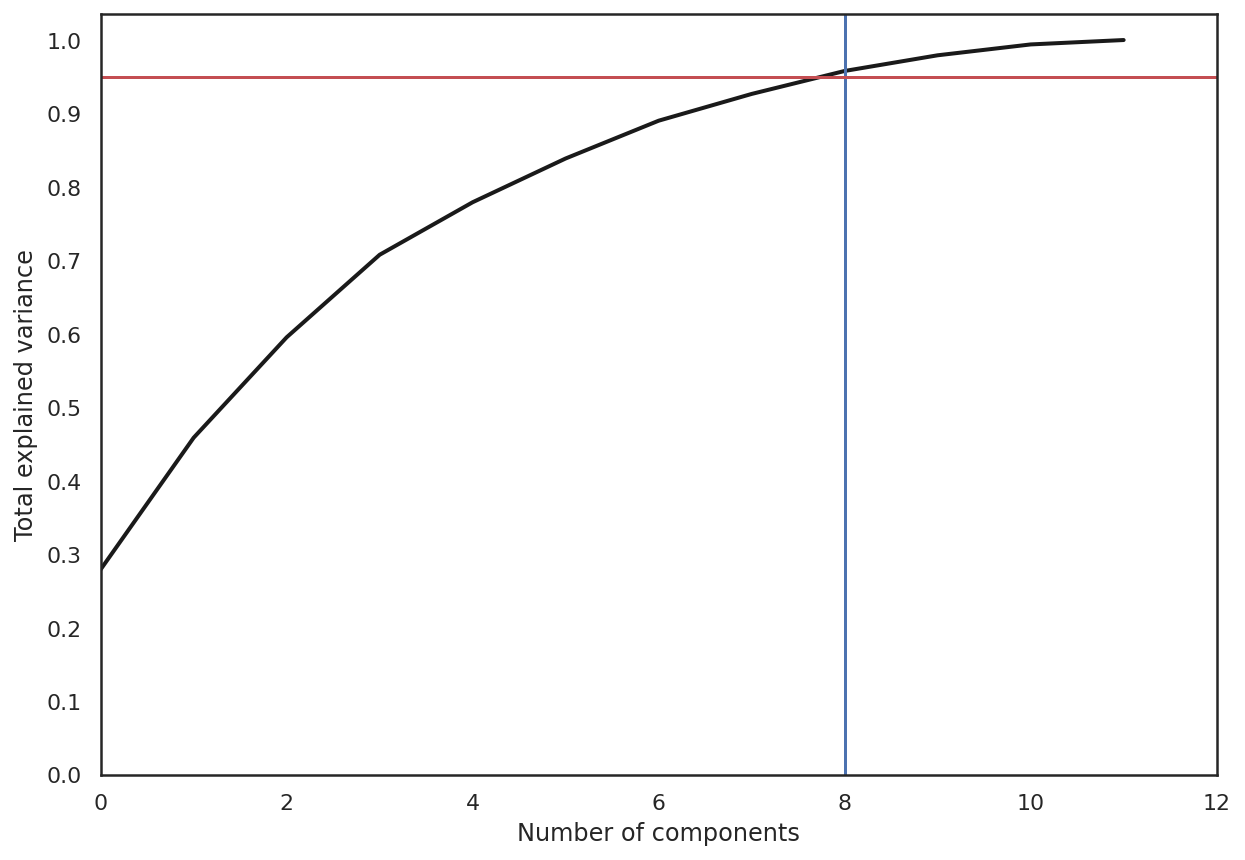

In [8]:

# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [9]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [10]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

In [11]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:

# Decision Trees First
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    4.5s finished


(DecisionTreeClassifier(max_depth=4, max_features=17), 0.43809523809523815)

In [14]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   44.4s finished


(RandomForestClassifier(max_depth=5, max_features=8, n_jobs=-1, oob_score=True,
                        random_state=42),
 0.38095238095238093)

In [15]:

# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished


({'n_neighbors': 4}, 0.3)

In [16]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7ANmgFJ8YDBh0uUOfSeYrX,0.710,0.909,2,-2.777,1,0.0639,0.013500,0.001230,0.3030,0.648,115.001,audio_features,7ANmgFJ8YDBh0uUOfSeYrX,spotify:track:7ANmgFJ8YDBh0uUOfSeYrX,https://api.spotify.com/v1/tracks/7ANmgFJ8YDBh...,https://api.spotify.com/v1/audio-analysis/7ANm...,207947,4
1dG3YWhLiTyFfTJyT2DanJ,0.796,0.784,11,-3.713,1,0.0610,0.147000,0.000005,0.1050,0.818,127.507,audio_features,1dG3YWhLiTyFfTJyT2DanJ,spotify:track:1dG3YWhLiTyFfTJyT2DanJ,https://api.spotify.com/v1/tracks/1dG3YWhLiTyF...,https://api.spotify.com/v1/audio-analysis/1dG3...,211947,4
58jx3tTuDuzHysC77c0AQd,0.642,0.823,0,-5.717,1,0.0289,0.001590,0.000000,0.0776,0.431,122.977,audio_features,58jx3tTuDuzHysC77c0AQd,spotify:track:58jx3tTuDuzHysC77c0AQd,https://api.spotify.com/v1/tracks/58jx3tTuDuzH...,https://api.spotify.com/v1/audio-analysis/58jx...,227344,4
1WK7eLVsD0zH4UWm9ob3z6,0.628,0.717,9,-9.055,1,0.0416,0.393000,0.000002,0.0490,0.582,91.207,audio_features,1WK7eLVsD0zH4UWm9ob3z6,spotify:track:1WK7eLVsD0zH4UWm9ob3z6,https://api.spotify.com/v1/tracks/1WK7eLVsD0zH...,https://api.spotify.com/v1/audio-analysis/1WK7...,384907,4
2jsmSLoX8y0h6k4YzDCFH1,0.441,0.921,8,-3.320,1,0.0436,0.000526,0.000006,0.1770,0.182,175.001,audio_features,2jsmSLoX8y0h6k4YzDCFH1,spotify:track:2jsmSLoX8y0h6k4YzDCFH1,https://api.spotify.com/v1/tracks/2jsmSLoX8y0h...,https://api.spotify.com/v1/audio-analysis/2jsm...,189720,4


In [17]:
X_test_names = v.transform(rec_track_names)

In [18]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [19]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [20]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

In [21]:
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==8]['index'].values.tolist()

In [22]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(544, (544, 14), 265)

In [23]:
recs_to_add = recs_to_add[0:99]

In [24]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name='Recommended Songs for Playlist 2 - {}'.format(sourcePlaylist['name']))

In [25]:
sp.user_playlist_add_tracks(username, playlist_recs['id'], recs_to_add);